# Visualize labels from A2C Watershed to Final Inference

In [1]:
import numpy as np
from glob import glob
import cv2
import os

import matplotlib.pyplot as plt
from utils import util_seg

2024-08-13 23:29:53.194467: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory
2024-08-13 23:29:53.194539: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory
2024-08-13 23:29:53.194545: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


## Vizualize u-net pred - donuts

In [2]:
color_list_a2c = [(0,0,0), (255,135,125), (255,65,65)]
label_map_a4c = [ "background","left_atrium", "left_ventricle"]

def step_visualization(base_from):
    """
    Visualizes the step-by-step prediction process for a given set of images.
    Args:
        base_from (str): The base directory path where the images are located.
    Returns:
        None
    """

    step1 = os.path.join(base_from, 'a2c_watershed_labels')
    step1_stretched = os.path.join(base_from, 'a2c_step2_labels')
    step3 = os.path.join(base_from, 'a2c_final_inference')

    for filename in glob(os.path.join(base_from, 'a2c_images/*npy')):

        ID = os.path.basename(filename)
        img_fov = np.load(filename)

        img_256 = cv2.resize(img_fov, (256,256), interpolation = cv2.INTER_AREA)
        img_256 = ((img_256-img_256.min())/(img_256.max() - img_256.min())).astype('float32')

        #### Step 1 prediction ####
        step1_label = np.load(os.path.join(step1, ID))
        step1_img_rgb = util_seg.cat_to_color(step1_label[np.newaxis], color_list_a2c)    

        #### Step 2 prediction ####
        step1_stretched_label = np.load(os.path.join(step1_stretched, ID))
        step1_stretched_img_rgb = util_seg.cat_to_color(step1_stretched_label[np.newaxis], color_list_a2c)

        #### Step 3 prediction ####
        step3_label = np.load(os.path.join(step3, ID))
        step3_img_rgb = util_seg.cat_to_color(step3_label[np.newaxis], color_list_a2c)   

        fig, ax_arr = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(30, 20))
        ax1, ax2, ax3, ax4 = ax_arr.ravel()

        ax1.imshow(img_256[...,0], cmap='gray')
        ax1.set_title(f'Original img', fontsize=20)
        ax1.set_ylabel(ID, fontsize=20)

        ax1.axes.get_xaxis().set_ticks([])
        ax1.axes.get_yaxis().set_ticks([])

        ax2.imshow(step1_img_rgb[0].astype('uint8'), cmap="gray")
        ax2.set_title(f'Step 1 - Initial weak label',fontsize=20)

        ax3.imshow(step1_stretched_img_rgb[0].astype('uint8'), cmap="gray")
        ax3.set_title(f'Step 2 - Prediction',fontsize=20)

        ax4.imshow(step3_img_rgb[0].astype('uint8'),cmap='gray')
        ax4.set_title(f'Step 3 - Prediction',fontsize=20)

        plt.show()

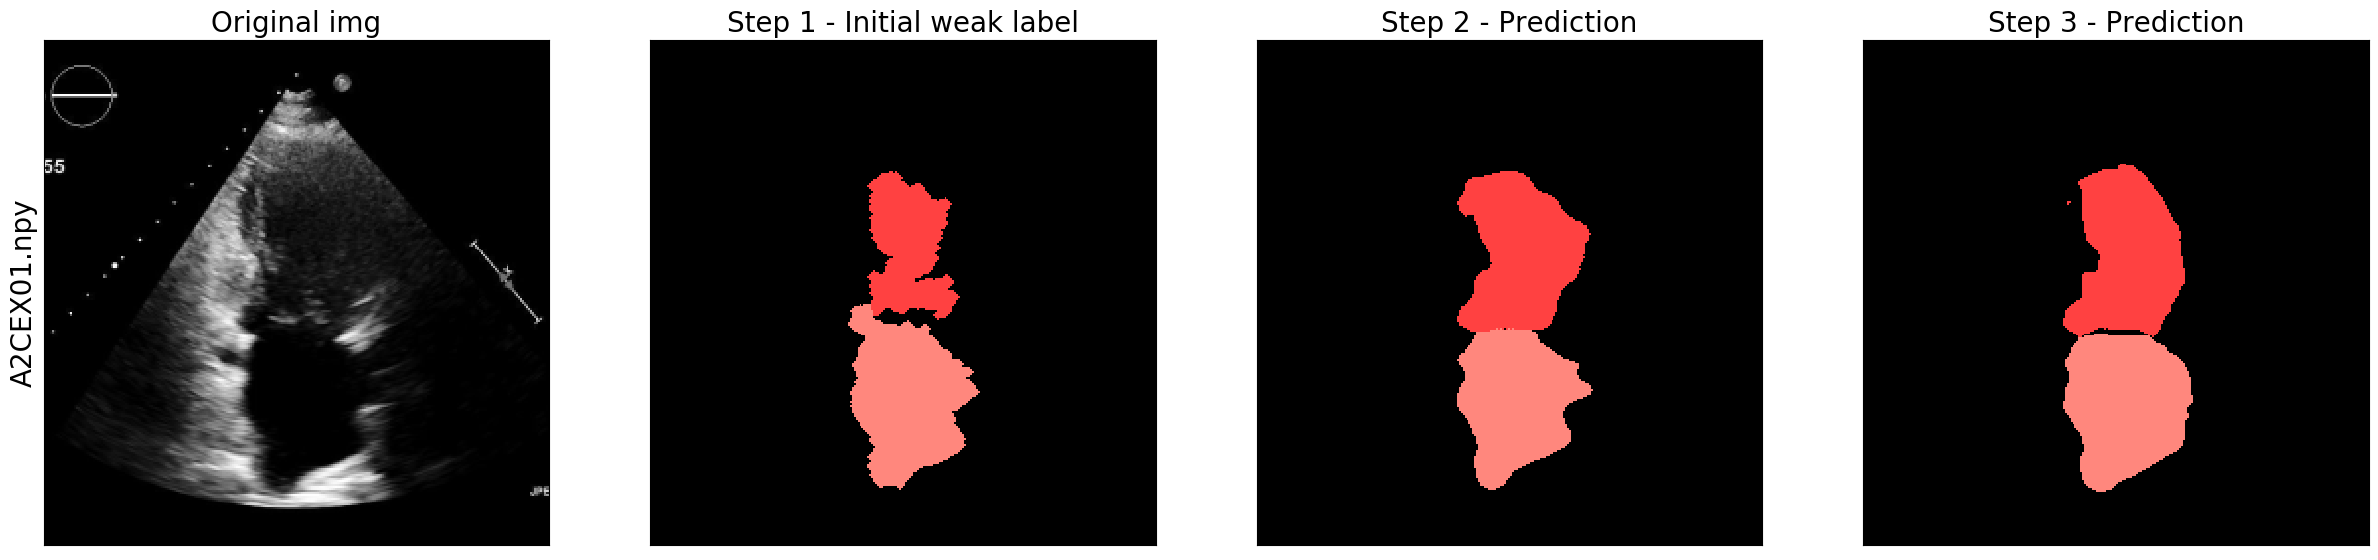

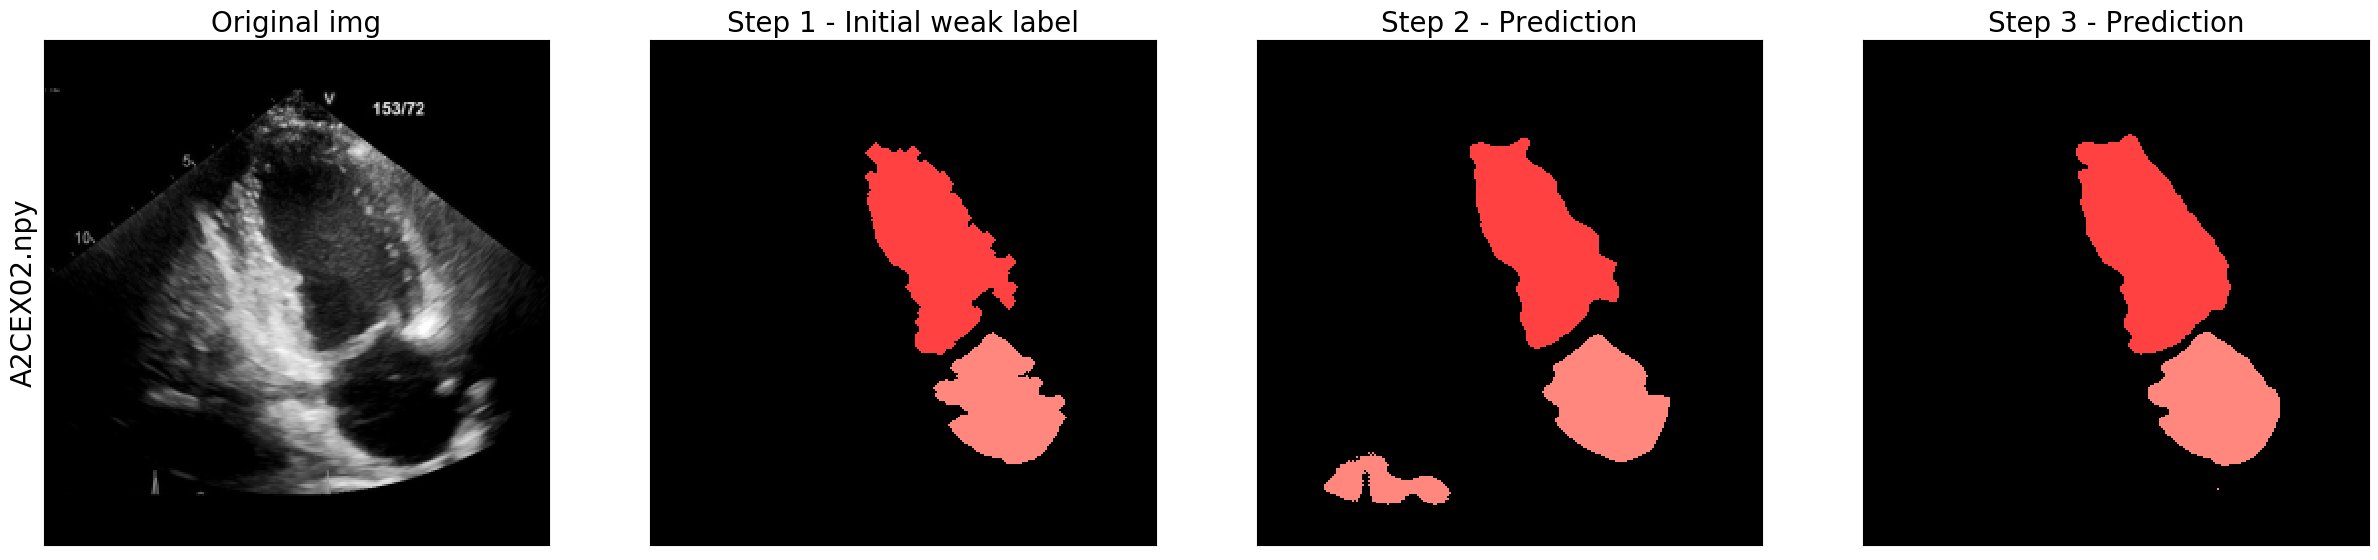

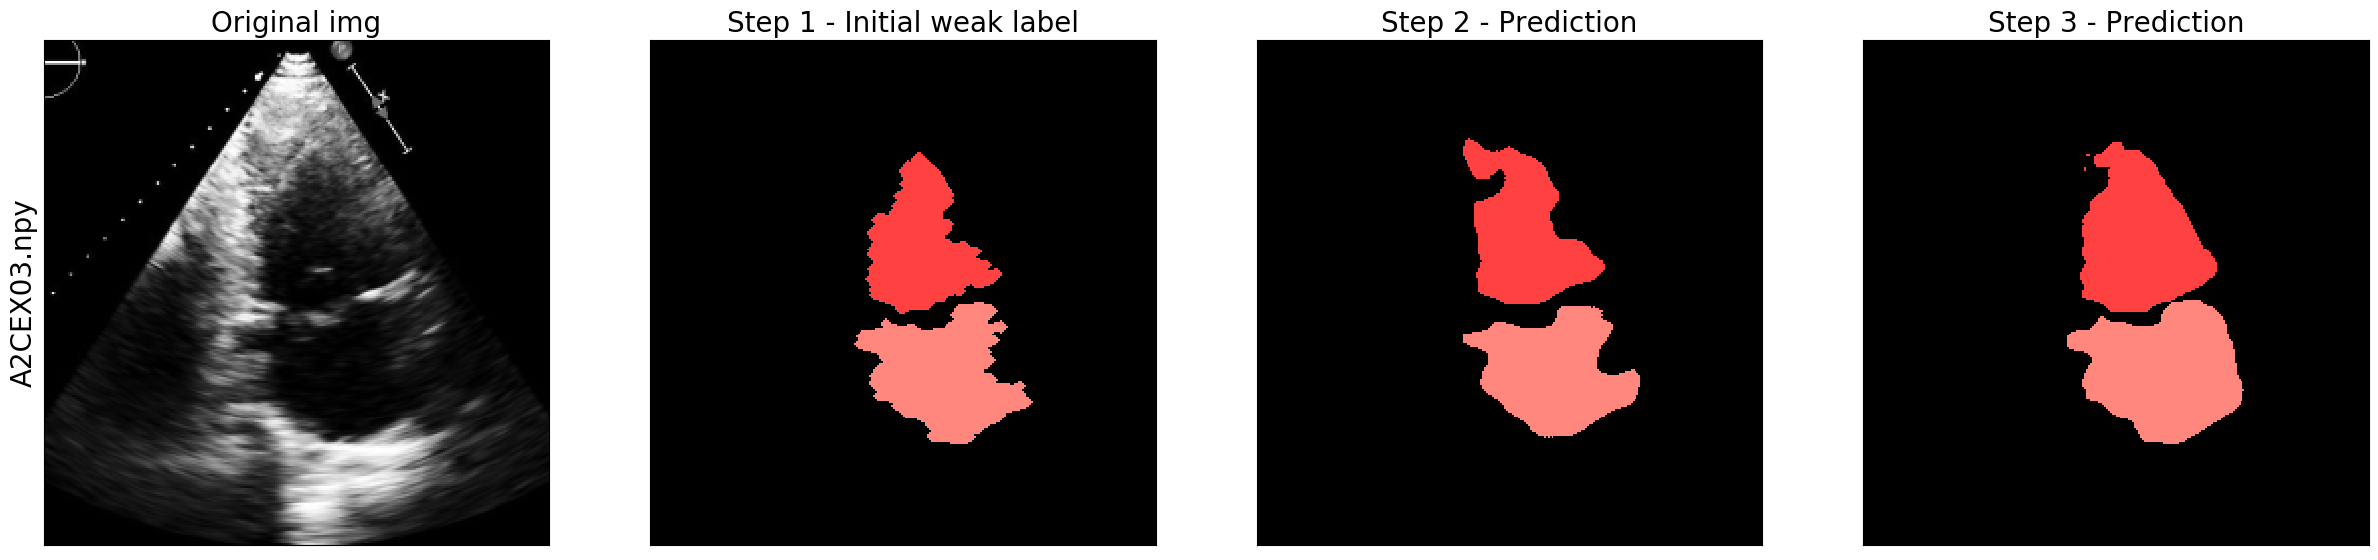

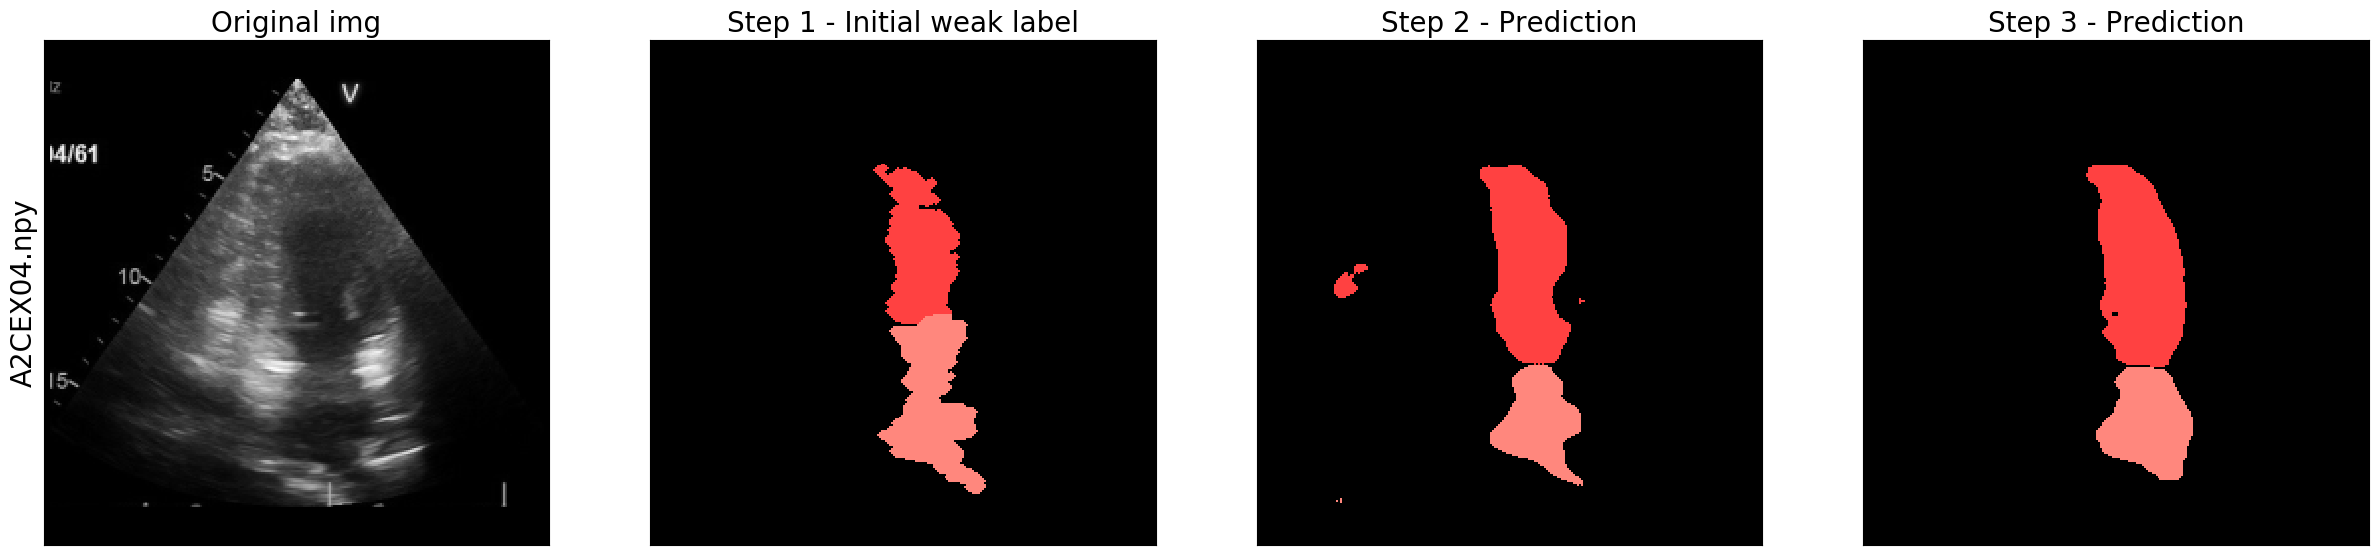

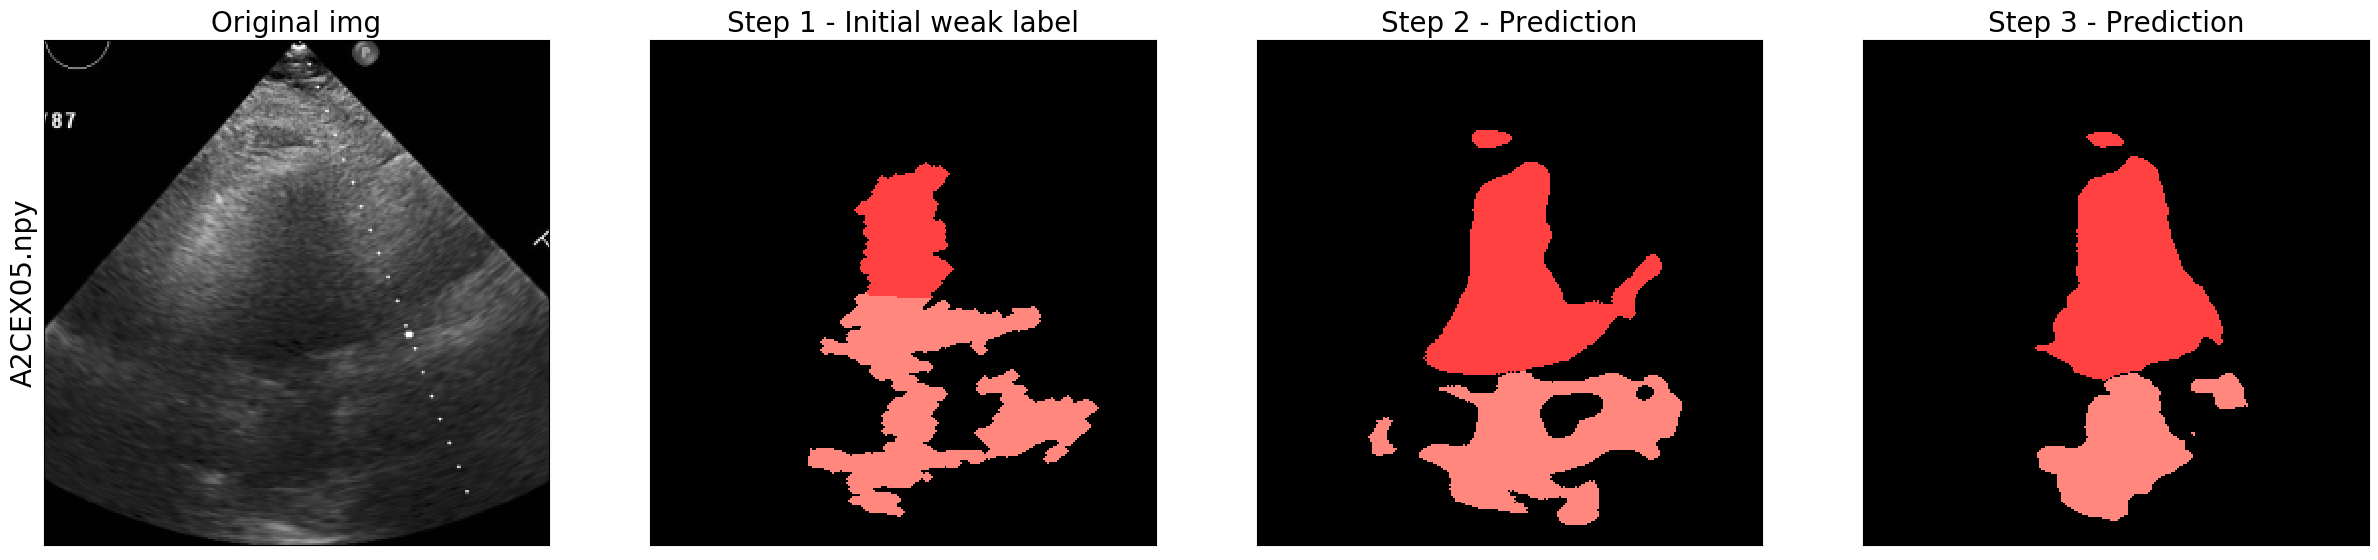

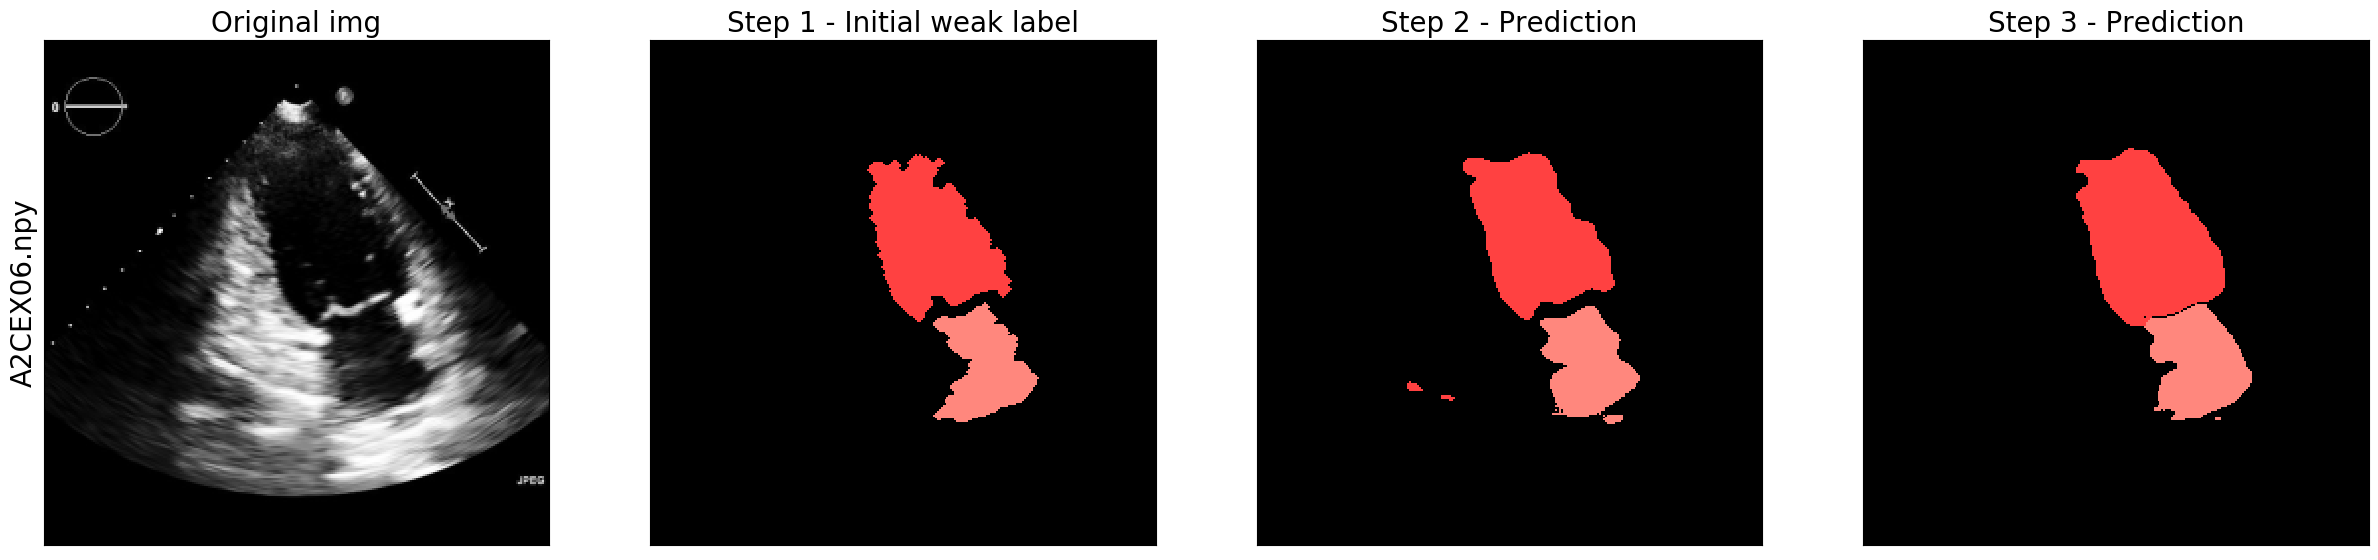

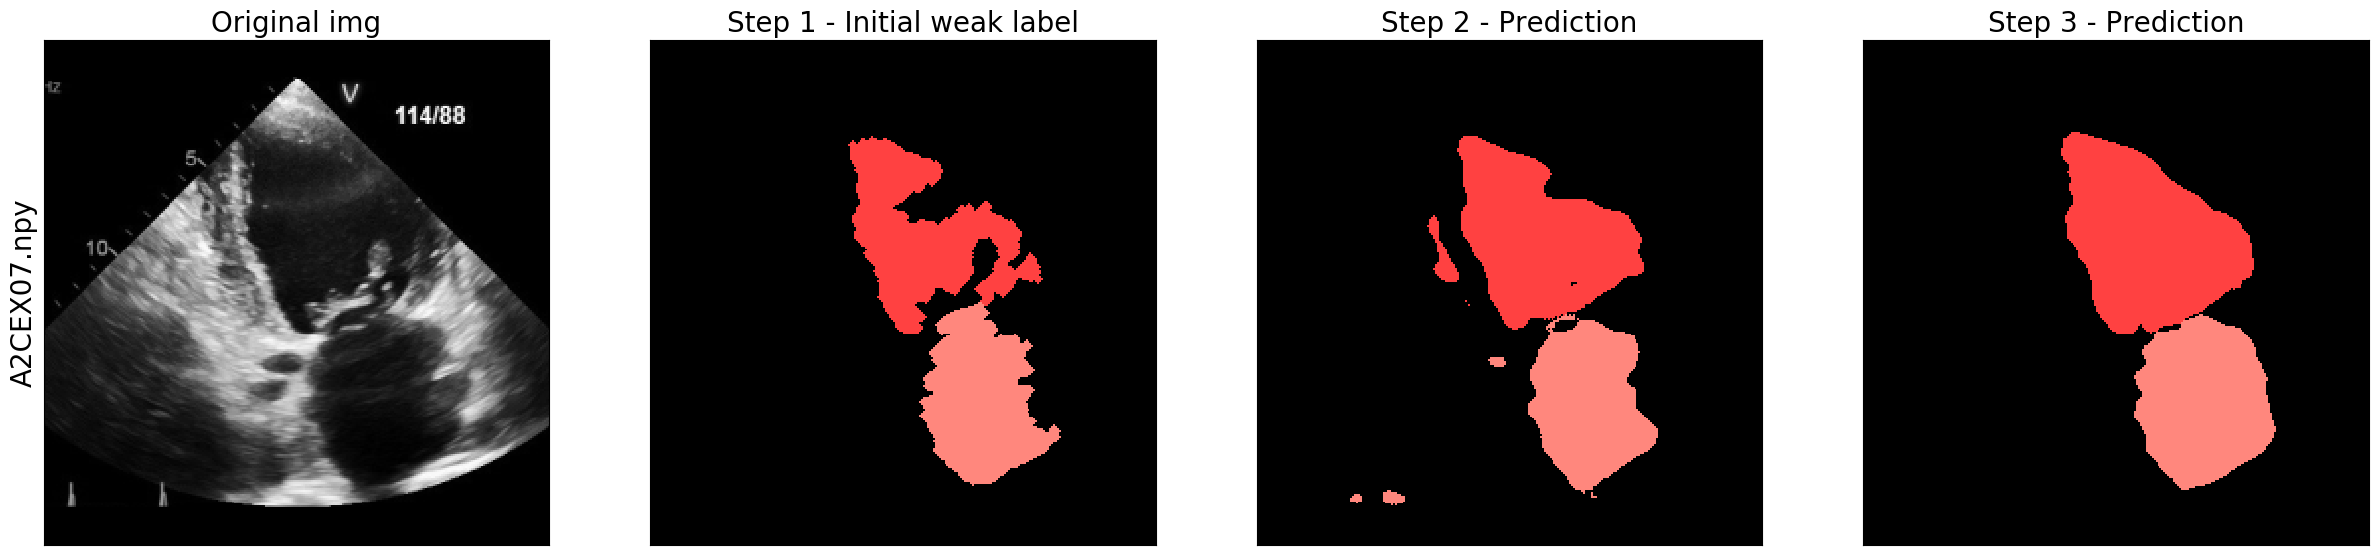

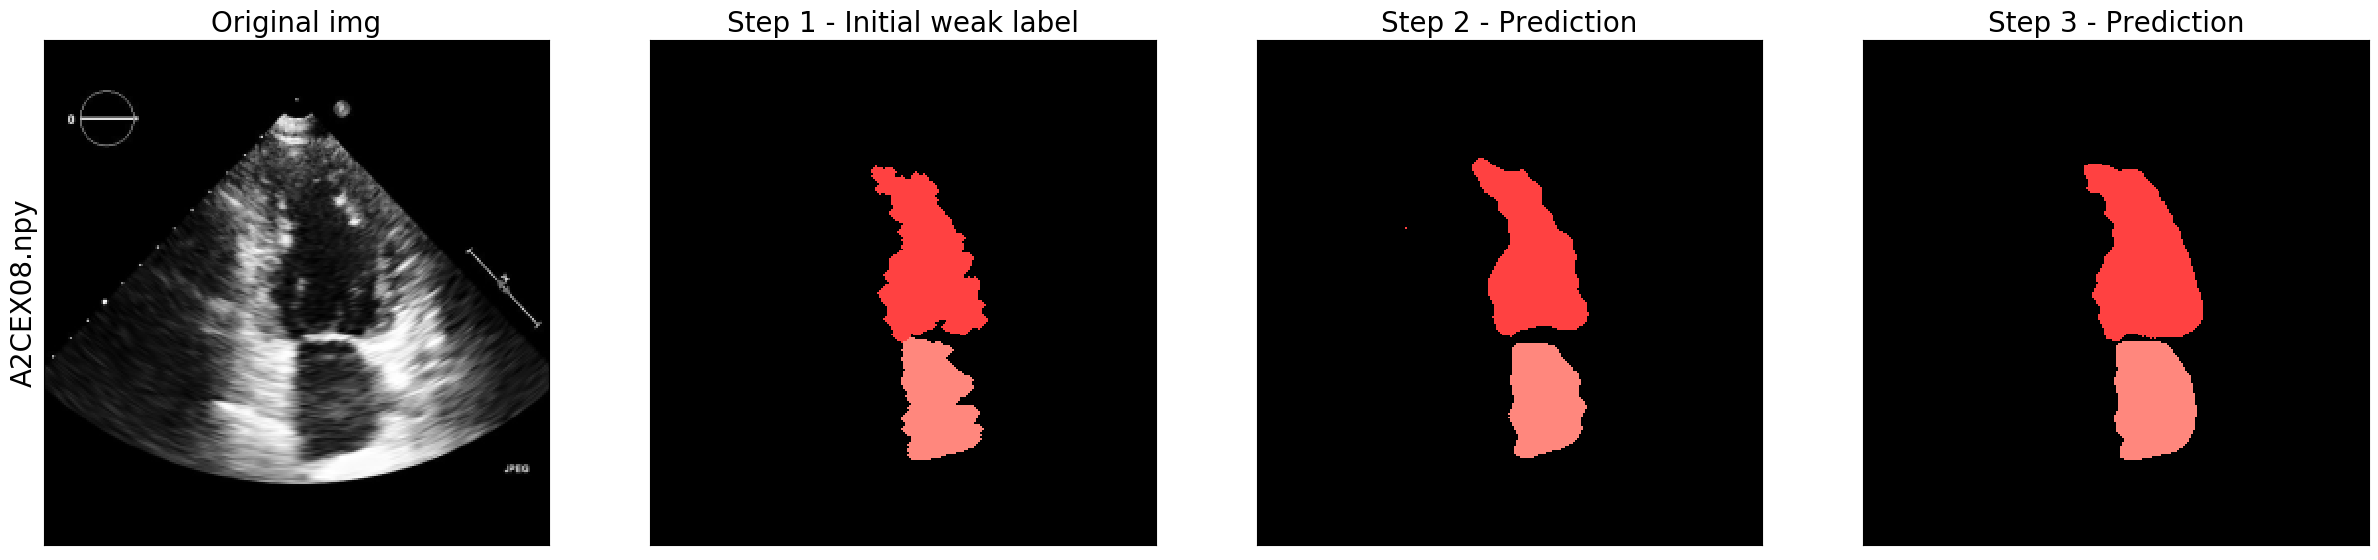

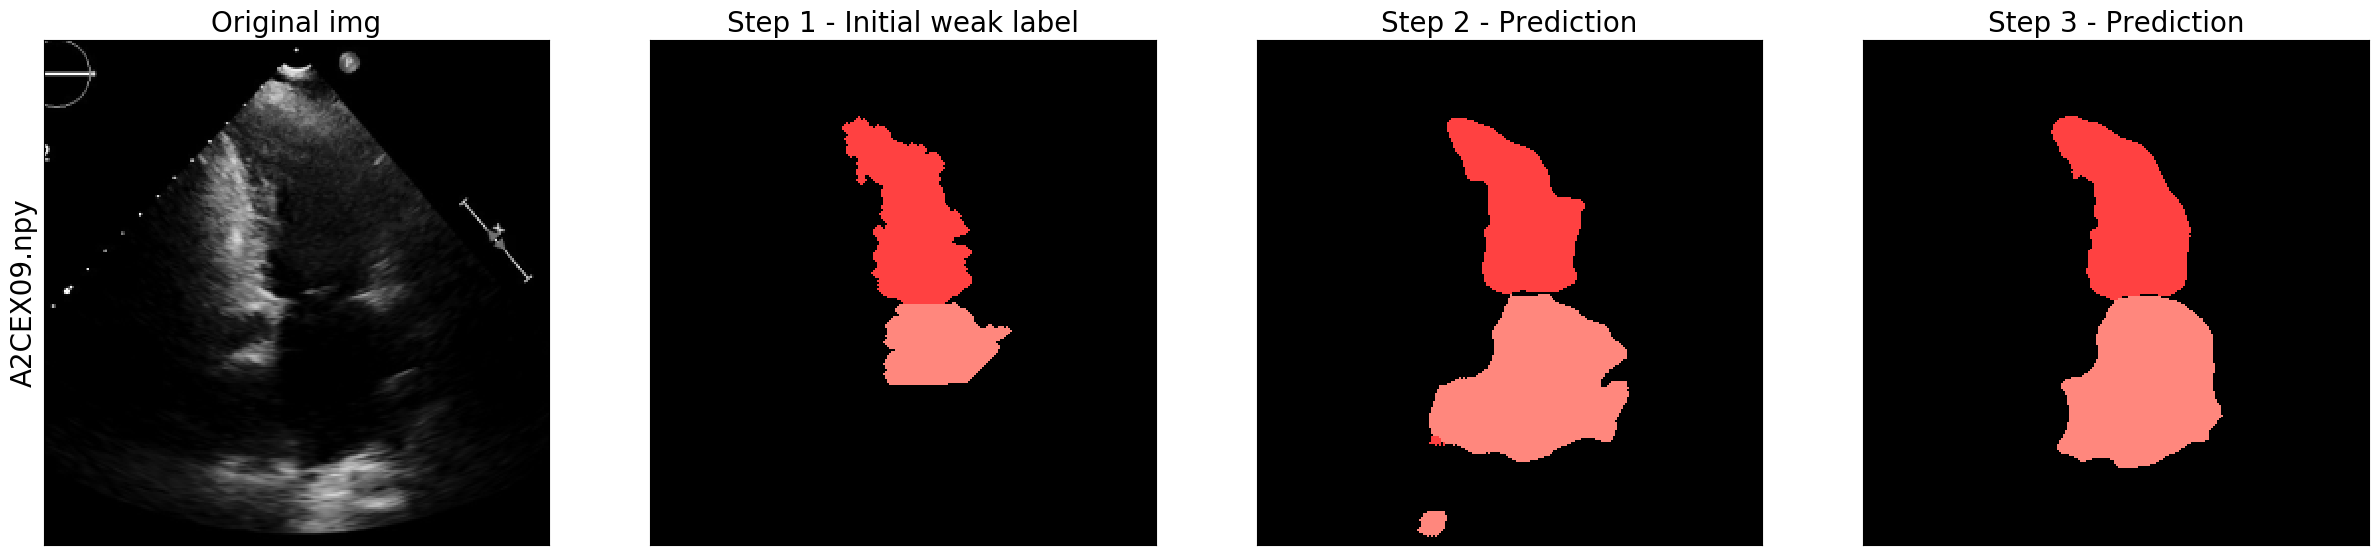

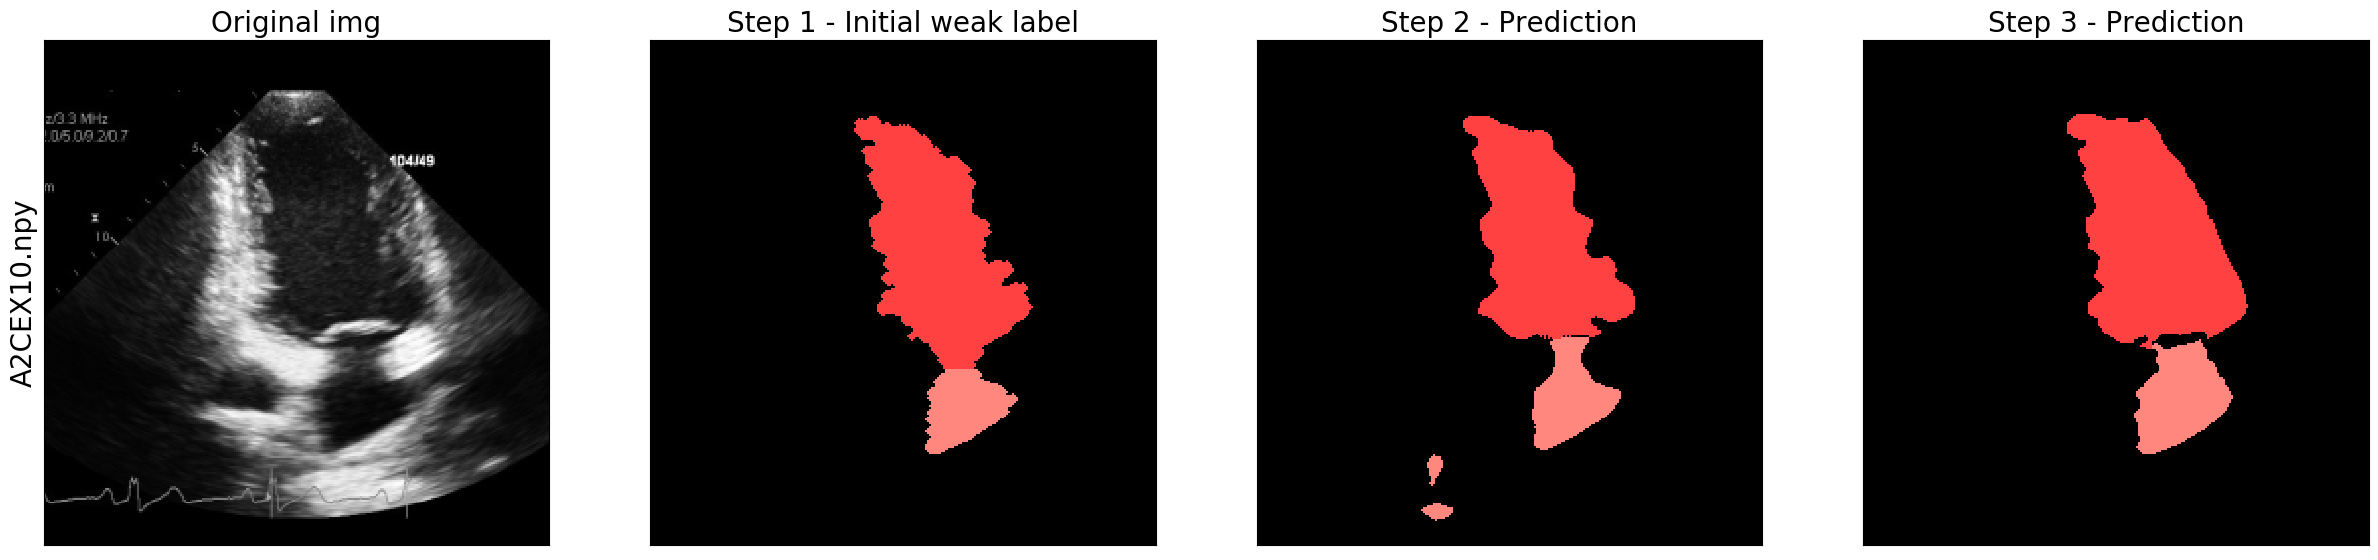

In [3]:
base_from = "example_data/A2C"
step_visualization(base_from)